In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,MaxPooling2D
from keras.models import Sequential

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

 68% 44.0M/65.2M [00:00<00:00, 160MB/s]
100% 65.2M/65.2M [00:00<00:00, 171MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/emotion-detection-fer.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
batch_size  = 128
picture_size = 48

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory("/content/train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory("/content/test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
no_of_classes = 7

# create CNN model

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',activation="relu",input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

#Fitting the Model with Training and Validation Data

In [10]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [11]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-11-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
224/224 [==============================] - ETA: 0s - loss: 2.0178 - accuracy: 0.2624

224/224 [==============================] - 29s 76ms/step - loss: 2.0178 - accuracy: 0.2624 - val_loss: 1.6703 - val_accuracy: 0.3401 - lr: 0.0010
Epoch 2/48
224/224 [==============================] - ETA: 0s - loss: 1.5831 - accuracy: 0.4053

224/224 [==============================] - 15s 68ms/step - loss: 1.5831 - accuracy: 0.4053 - val_loss: 1.4873 - val_accuracy: 0.4376 - lr: 0.0010
Epoch 3/48
224/224 [==============================] - ETA: 0s - loss: 1.3479 - accuracy: 0.4892

224/224 [==============================] - 16s 70ms/step - loss: 1.3479 - accuracy: 0.4892 - val_loss: 1.4096 - val_accuracy: 0.4699 - lr: 0.0010
Epoch 4/48
224/224 [==============================] - ETA: 0s - loss: 1.2141 - accuracy: 0.5412

224/224 [==============================] - 16s 71ms/step - loss: 1.2141 - accuracy: 0.5412 - val_loss: 1.3025 - val_accuracy: 0.4888 - lr: 0.0010
Epoch 5/48
223/224 [============================>.] - ETA: 0s - loss: 1.1304 - accuracy: 0.5710

224/224 [==============================] - 16s 71ms/step - loss: 1.1304 - accuracy: 0.5710 - val_loss: 1.3628 - val_accuracy: 0.5018 - lr: 0.0010
Epoch 6/48
224/224 [==============================] - ETA: 0s - loss: 1.0692 - accuracy: 0.5964

224/224 [==============================] - 15s 68ms/step - loss: 1.0692 - accuracy: 0.5964 - val_loss: 1.1120 - val_accuracy: 0.5773 - lr: 0.0010
Epoch 7/48
224/224 [==============================] - ETA: 0s - loss: 1.0089 - accuracy: 0.6217

224/224 [==============================] - 16s 71ms/step - loss: 1.0089 - accuracy: 0.6217 - val_loss: 1.2800 - val_accuracy: 0.5227 - lr: 0.0010
Epoch 8/48
224/224 [==============================] - ETA: 0s - loss: 0.9441 - accuracy: 0.6440

224/224 [==============================] - 16s 71ms/step - loss: 0.9441 - accuracy: 0.6440 - val_loss: 1.1652 - val_accuracy: 0.5737 - lr: 0.0010
Epoch 9/48
224/224 [==============================] - ETA: 0s - loss: 0.8757 - accuracy: 0.6732

224/224 [==============================] - 16s 71ms/step - loss: 0.8757 - accuracy: 0.6732 - val_loss: 1.0924 - val_accuracy: 0.6046 - lr: 0.0010
Epoch 10/48
224/224 [==============================] - ETA: 0s - loss: 0.8143 - accuracy: 0.6967

224/224 [==============================] - 16s 71ms/step - loss: 0.8143 - accuracy: 0.6967 - val_loss: 1.1100 - val_accuracy: 0.6051 - lr: 0.0010
Epoch 11/48
224/224 [==============================] - ETA: 0s - loss: 0.7598 - accuracy: 0.7184

224/224 [==============================] - 15s 68ms/step - loss: 0.7598 - accuracy: 0.7184 - val_loss: 1.1855 - val_accuracy: 0.5900 - lr: 0.0010
Epoch 12/48
224/224 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.7404Restoring model weights from the end of the best epoch: 9.



Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
224/224 [==============================] - 15s 68ms/step - loss: 0.6937 - accuracy: 0.7404 - val_loss: 1.1820 - val_accuracy: 0.5982 - lr: 0.0010
Epoch 12: early stopping


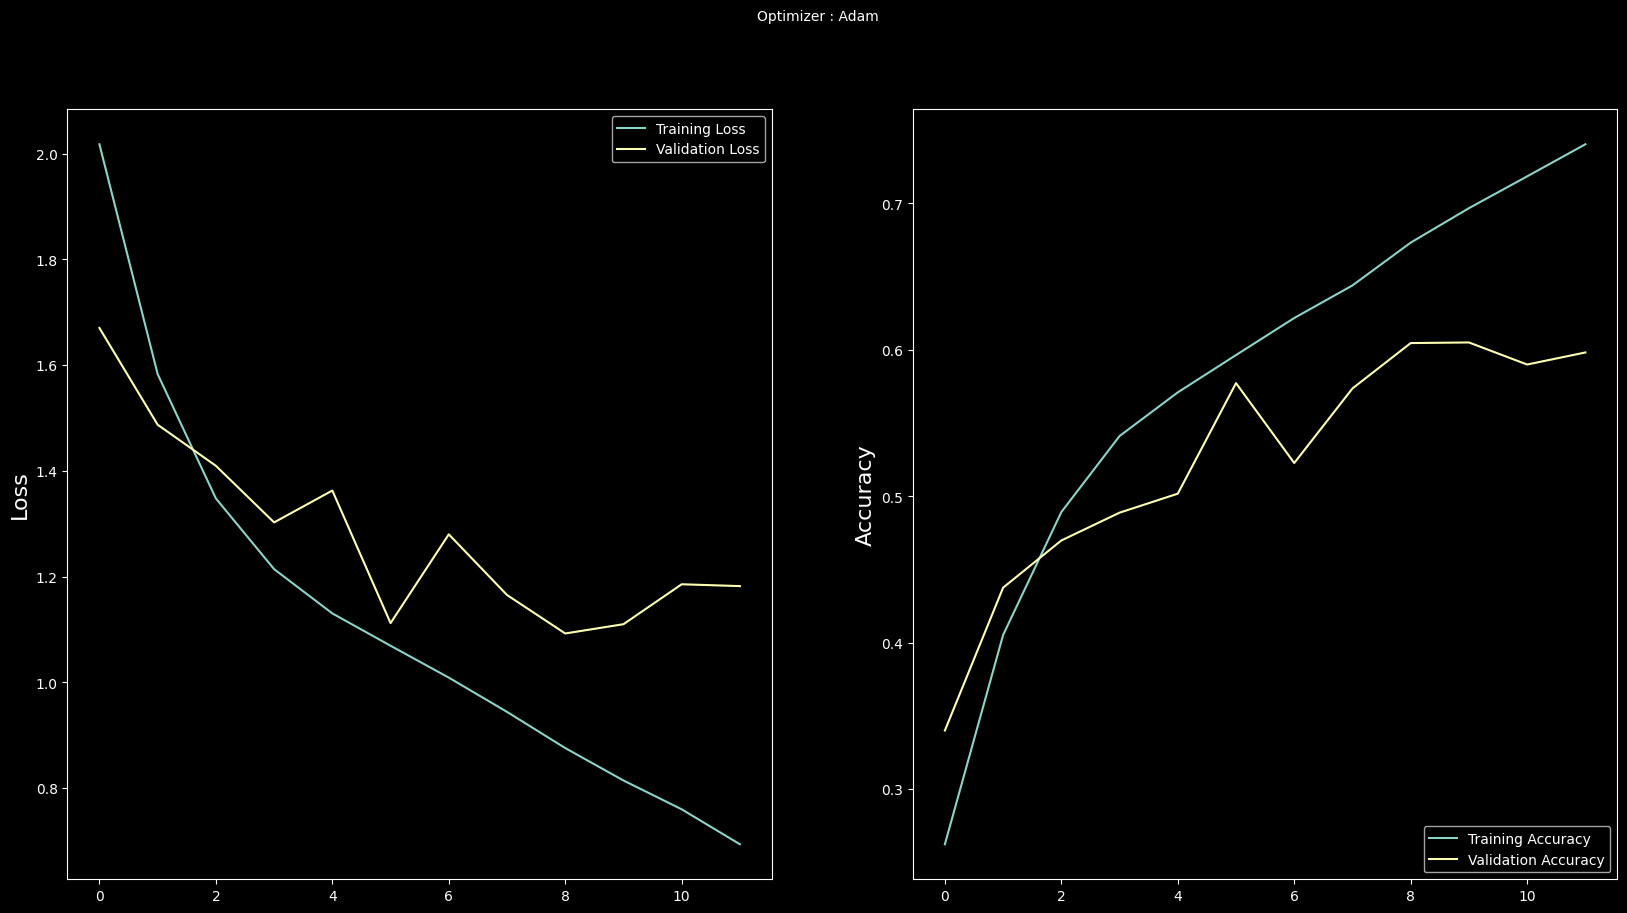

In [12]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()